<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Preprocess-Scrapped-Data-for-collaboration-network" data-toc-modified-id="Preprocess-Scrapped-Data-for-collaboration-network-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preprocess Scrapped Data for collaboration network</a></span></li><li><span><a href="#PeopleOfInformatics.csv:" data-toc-modified-id="PeopleOfInformatics.csv:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><code>PeopleOfInformatics</code>.csv:</a></span><ul class="toc-item"><li><span><a href="#Check-for-duplicated-names" data-toc-modified-id="Check-for-duplicated-names-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Check for duplicated <code>names</code></a></span></li><li><span><a href="#Check-the-institute-field" data-toc-modified-id="Check-the-institute-field-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Check the <code>institute</code> field</a></span></li><li><span><a href="#Create-a-mapping-for-the-institutes-found" data-toc-modified-id="Create-a-mapping-for-the-institutes-found-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Create a mapping for the <code>institutes</code> found</a></span></li><li><span><a href="#Alias/shortnames" data-toc-modified-id="Alias/shortnames-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Alias/shortnames</a></span></li></ul></li><li><span><a href="#Using-publications.csv-information:" data-toc-modified-id="Using-publications.csv-information:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Using <code>publications.csv</code> information:</a></span><ul class="toc-item"><li><span><a href="#Assigning-unique-ID-to-external-academic" data-toc-modified-id="Assigning-unique-ID-to-external-academic-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Assigning unique ID to external academic</a></span></li><li><span><a href="#Add-id-of-collaborators-into-lookup_pub" data-toc-modified-id="Add-id-of-collaborators-into-lookup_pub-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Add id of collaborators into <code>lookup_pub</code></a></span></li><li><span><a href="#Generate-Edgelist" data-toc-modified-id="Generate-Edgelist-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Generate Edgelist</a></span></li><li><span><a href="#Additional-metrics" data-toc-modified-id="Additional-metrics-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Additional metrics</a></span></li><li><span><a href="#Store-the-dataset" data-toc-modified-id="Store-the-dataset-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Store the dataset</a></span></li></ul></li><li><span><a href="#Add-information-onlookup_poinf" data-toc-modified-id="Add-information-onlookup_poinf-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Add information on<code>lookup_poinf</code></a></span><ul class="toc-item"><li><span><a href="#investigate-researchers-w/o-publications" data-toc-modified-id="investigate-researchers-w/o-publications-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>investigate researchers w/o publications</a></span></li></ul></li><li><span><a href="#Visualising-data,-generative-statistics" data-toc-modified-id="Visualising-data,-generative-statistics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Visualising data, generative statistics</a></span><ul class="toc-item"><li><span><a href="#Researchers" data-toc-modified-id="Researchers-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Researchers</a></span></li><li><span><a href="#Distribution-of-institutes" data-toc-modified-id="Distribution-of-institutes-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Distribution of institutes</a></span></li><li><span><a href="#Distribution-of-publications-(by-year)" data-toc-modified-id="Distribution-of-publications-(by-year)-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Distribution of publications (by year)</a></span></li><li><span><a href="#Distribution-of-publications-(number-of-coauthors)" data-toc-modified-id="Distribution-of-publications-(number-of-coauthors)-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Distribution of publications (number of coauthors)</a></span></li></ul></li></ul></div>

---
# Preprocess Scrapped Data for collaboration network

In this notebook, we clean the data that was scrapped from Edinbugh Research Explorer for the School of Informatics. Preprocessing the data is critical especially for this dataset, as it was noted by many other researchers on collaboration networks that the data collected are usually fuzzy (the problem of alias being used inconsistently for many individuals will resurface later). 

In [9]:
import pandas as pd
import os, csv

In [10]:
peopleOfInf_csv = '../data_schoolofinf/peopleOfInformatics.csv'
publications_csv = '../data_schoolofinf/publications.csv'

INST = [
    "institute for adaptive and neural computation",
    "institute for computing systems architecture",
    "institute of language cognition and computation",
    "institute of perception action and behaviour",
    "laboratory for foundations of computer science",
    "centre for intelligent systems and their applications",
    "neuroinformatics dtc"
]

# `PeopleOfInformatics`.csv:
This file contains information about the individuals in the School of Informatics. Information scrapped includes 

1. An unique individual id,
2. First and Last name,
3. indvidual's position in the school, and
4. institute they belong to

In [3]:
# Import the csv:
pd_pplOfInf = \
pd.read_csv(
    filepath_or_buffer=peopleOfInf_csv,
    names=[
        'id', 'last_name', 'first_name', 'personal_url', 'position', 'parent',
        'institute'
    ],
    index_col='id')

In [5]:
# create a column for the full name (= last_name + full_name)
_join_names = lambda x_y: " ".join([x_y[0], x_y[1]])
pd_pplOfInf['full_name'] = list(
    map(_join_names, list(zip(pd_pplOfInf['last_name'], pd_pplOfInf['first_name']))))

print('imported: ', len(pd_pplOfInf.index))
print('number of indivudals =', len(pd.unique(pd_pplOfInf['full_name'])))

imported:  291
number of indivudals = 288


There are some names, three to be specific, that are duplicated!

## Check for duplicated `names`

In [6]:
dups_full_name = pd_pplOfInf.duplicated(subset='full_name', keep=False)
small = pd_pplOfInf[dups_full_name]
small

,last_name,first_name,personal_url,position,parent,institute,full_name
id,,,,,,,
003ec9bb-18aa-4e6e-95e9-359f0968262a,gray,gavin,http://www.research.ed.ac.uk/portal/en/persons...,research assistant,school of informatics,institute for adaptive and neural computation,gray gavin
11447e11-aff5-438e-8fb6-264da9fb5483,gray,gavin,http://www.research.ed.ac.uk/portal/en/persons...,unknown,neuroinformatics dtc,UNKNOWN,gray gavin
265079a1-b5d5-4ff1-bf46-d0ad26e0d424,maneth,sebastian,http://www.research.ed.ac.uk/portal/en/persons...,unknown,laboratory for foundations of computer science,UNKNOWN,maneth sebastian
ef703785-d96b-49af-9b95-df74fa8fc4a2,maneth,sebastian,http://www.research.ed.ac.uk/portal/en/persons...,visitor official visitor,school of informatics,UNKNOWN,maneth sebastian
0ed800f5-a3a0-47d7-a8b3-f97a4f2b6931,steuwer,michel,http://www.research.ed.ac.uk/portal/en/persons...,unknown,institute for computing systems architecture,UNKNOWN,steuwer michel
5ddb75bd-0bf1-4792-ba2f-52821719fc3b,steuwer,michel,http://www.research.ed.ac.uk/portal/en/persons...,visitor official visitor,school of informatics,UNKNOWN,steuwer michel


Manually checking the data gives us:

1) `gray gavin`
    - (11447e11-aff5-438e-8fb6-264da9fb5483) is the main page with multiple research output
    - (003ec9bb-18aa-4e6e-95e9-359f0968262a) does not have any research output

2) `maneth,sebastian`
    - (265079a1-b5d5-4ff1-bf46-d0ad26e0d424) is the main page with multiple research output
    - (ef703785-d96b-49af-9b95-df74fa8fc4a2) does not have any research output

3) `steuwer,michel`
    - (0ed800f5-a3a0-47d7-a8b3-f97a4f2b6931) is the main page with multiple output
    - (5ddb75bd-0bf1-4792-ba2f-52821719fc3b) does not have any research output



In [7]:
# Corresponding IDs to be dropped!
to_drop = [
    '003ec9bb-18aa-4e6e-95e9-359f0968262a',  # Gray
    'ef703785-d96b-49af-9b95-df74fa8fc4a2',  # Maneth
    '5ddb75bd-0bf1-4792-ba2f-52821719fc3b'  # Steuwer
]

In [8]:
# manually remove these individuals
pd_pplOfInf_dropped = pd_pplOfInf[~pd_pplOfInf.index.isin(to_drop)]

In [9]:
# Confirm that the number of individuals tallies:
print('size of df: ', len(pd_pplOfInf_dropped))
print('number of indivudals =', len(
    pd.unique(pd_pplOfInf_dropped['full_name'])))

size of df:  288
number of indivudals = 288


## Check the `institute` field
There are multiple institutes field where `school of informatics` was present; while most are labelled `UNKNOWN` by the scrapper as no such information is present.

`Before processing institute field:`

In [10]:
# separate the individuals by community:
gb = pd_pplOfInf_dropped.groupby('institute')
for k, group in gb:
    print('{}: {}'.format(k, len(group)))

UNKNOWN: 82
centre for intelligent systems and their applications: 18
deanery of clinical sciences: 1
deanery of molecular genetic and population health sciences: 1
edinburgh neuroscience: 1
institute for adaptive and neural computation: 28
institute for computing systems architecture: 24
institute of language cognition and computation: 54
institute of perception action and behaviour: 18
laboratory for foundations of computer science: 58
school of informatics: 2
school of philosophy psychology and language sciences: 1


The distribution of the individuals in the institutes is not ideal; some of the institutes name may fall into the parent field. To avoid such instances, we copy the `parent`'s field into the `institute`'s field if the entry in the parent's field belongs to one of the institute names

In [11]:
pd_pplOfInf_c = pd_pplOfInf_dropped.copy()

In [18]:
def check_inst(row):
    """
    # check that the dataset for institute names:
    # if parent is not 'school of informatics', and institute is unknown, copy it over:
    """
    INST = [
        "institute for adaptive and neural computation",
        "institute for computing systems architecture",
        "institute of language cognition and computation",
        "institute of perception action and behaviour",
        "laboratory for foundations of computer science",
        "centre for intelligent systems and their applications",
        "neuroinformatics dtc"
    ]

    inst = row.institute
    par = row.parent

    if inst in INST:
        return inst
    if par in INST:
        return par
    elif inst == 'UNKNOWN' or inst == 'school of informatics':
        # We want to remove institute=school of informatics:
        if par == 'school of informatics':
            inst = 'UNKNOWN'
        else:
            inst = par
    else:
        print('unknown inst : {} or par: {}'.format(inst,par))

    return inst

In [19]:
pd_pplOfInf_c['institute'] = pd_pplOfInf_c.apply(check_inst, axis=1)

unknown inst : deanery of clinical sciences or par: centre for clinical brain sciences
unknown inst : school of philosophy psychology and language sciences or par: school of informatics


In [20]:
# Confirm that the number of individuals tallies:
print('size of df: ', len(pd_pplOfInf_c))
print('number of indivudals =', len(pd.unique(pd_pplOfInf_c['full_name'])))

size of df:  288
number of indivudals = 288


`After processing institute field`

In [21]:
print('AFTER PROCESSING')
# separate the individuals by community:
infcommunity = {}
gb = pd_pplOfInf_c.groupby('institute')
for k, group in gb:
    print('{}: {}'.format(k, len(group)))

AFTER PROCESSING
UNKNOWN: 46
centre for intelligent systems and their applications: 24
deanery of clinical sciences: 1
institute for adaptive and neural computation: 29
institute for computing systems architecture: 28
institute of language cognition and computation: 59
institute of perception action and behaviour: 19
laboratory for foundations of computer science: 64
neuroinformatics dtc: 17
school of philosophy psychology and language sciences: 1


## Create a mapping for the `institutes` found

In [22]:
# Creat a mapping for the institutes to classes:
institutes = dict()
k = 0
for i in pd.unique(pd_pplOfInf_c['institute']):
    institutes[i] = k
    k += 1
print('number of institutes found: {}'.format(len(institutes)))

number of institutes found: 10


In [23]:
# Save the institutes info:
import pickle as pkl
pkl.dump(institutes, open('../data_schoolofinf/institutes.pkl', 'wb'), pkl.HIGHEST_PROTOCOL)

Add the numeric class for institute:

In [24]:
# Set the class to each of the institute instance:
pd_pplOfInf_c['institute_class'] = pd_pplOfInf_c.apply(
    lambda row: institutes[row['institute']], axis=1)

In [25]:
# separate the individuals by community:
infcommunity = {}
gb = pd_pplOfInf_c.groupby('institute_class')
x = []
y = []
for k, group in gb:
    infcommunity[k] = group
    className = [name for (name, _k) in list(institutes.items()) if _k == k][0]
    x.append(className)
    y.append(len(group))
    print('class {}-{}: {}'.format(k, className, len(group)))

class 0-UNKNOWN: 46
class 1-centre for intelligent systems and their applications: 24
class 2-institute of language cognition and computation: 59
class 3-laboratory for foundations of computer science: 64
class 4-institute for adaptive and neural computation: 29
class 5-institute for computing systems architecture: 28
class 6-neuroinformatics dtc: 17
class 7-institute of perception action and behaviour: 19
class 8-deanery of clinical sciences: 1
class 9-school of philosophy psychology and language sciences: 1


From the Edinburgh Research Explorer, we know that [school of informatics](http://www.research.ed.ac.uk/portal/en/organisations/school-of-informatics%28d9a3581f-93a4-4d74-bf29-14c86a1da9f4%29.html) have the following institutes:
- Centre for Intelligent Systems and their Applications (1)
- Institute of Language, Cognition and Computation (2)
- Laboratory for Foundations of Computer Science (3)
- Institute for Adaptive and Neural Computation (4)
- Institute for Computing Systems Architecture (5)
- Neuroinformatics DTC (6)
- Institute of Perception, Action and Behaviour (7)

with the numbers in the brackets corresponding to the mapping in the institutes dictionary. This will be useful later for our visualisation and creation of subgraphs

## Alias/shortnames

In publications, author's name are not spelled in full when cited. Rather, they are represented in contracted forms, such as `Calautti, M., Libkin, L. & Pieris, A` instead of `Marco Calautti, Leonid Libkin, & Andreas Pieris` respectively. This could be a problem down stream as an individual's name (in publication) may presented in full for some, and in shortname for others. This make mapping the a certain publication to individuals a challenge.

To mitigate this, additional information (scrapped from Edinburgh research explorer) to assign shortnames (aliases) to an individual will be useful. These shortnames are assign to an individual in the school if the name is linked to their personal page on the research explorer

In [26]:
# assign the alias to each individuals, if exists:
poinf_alias = '../data_schoolofinf/peopleOfInformatics_ALIAS.csv'
pd_poinf_alias = pd.read_csv(poinf_alias, names=['id', 'alias'])

In [27]:
# Check that we correctly drop the publications...
pd_poinf_alias[pd_poinf_alias['id'].isin(to_drop)]

,id,alias


In [28]:
# Merge the two pandas dataset to include the alias
lookup_poinf = pd_pplOfInf_c.join(pd_poinf_alias.set_index('id'), how='left')

In [29]:
lookup_poinf.head(3)

,last_name,first_name,personal_url,position,parent,institute,full_name,institute_class,alias
id,,,,,,,,,
23d17ab4-123f-4929-9373-763bd7587df8,alay,ozgu,http://www.research.ed.ac.uk/portal/en/persons...,visitor official visitor,school of informatics,UNKNOWN,alay ozgu,0,NaN
d089bb44-7d0b-4b3f-b556-27def993d1d1,albrecht,stefano,http://www.research.ed.ac.uk/portal/en/persons...,lecturer in artificial intelligence,school of informatics,centre for intelligent systems and their appli...,albrecht stefano,1,"albrecht, s. v.|albrecht, s."
ecd799fb-4f63-44ae-a078-b009099f2c8c,alex,beatrice,http://www.research.ed.ac.uk/portal/en/persons...,research fellow,school of informatics,institute of language cognition and computation,alex beatrice,2,"alex, b. (ed.)|alex, b.|symington, b."


In [30]:
lookup_poinf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, 23d17ab4-123f-4929-9373-763bd7587df8 to ccd9cd8c-9aee-4ede-a388-f82641ee8d29
Data columns (total 9 columns):
last_name          288 non-null object
first_name         288 non-null object
personal_url       288 non-null object
position           288 non-null object
parent             288 non-null object
institute          288 non-null object
full_name          288 non-null object
institute_class    288 non-null int64
alias              229 non-null object
dtypes: int64(1), object(8)
memory usage: 32.5+ KB


Note the discrepancy in number of alias object and number of index

In [31]:
# Investigating these individual with un defined aliases...
noAlias = lookup_poinf[lookup_poinf.alias.isna()]
print('# poinf without any alias: {}'.format(len(noAlias)))

# poinf without any alias: 59


In [32]:
pd.unique(noAlias.institute)

array(['UNKNOWN', 'institute of language cognition and computation',
       'centre for intelligent systems and their applications',
       'laboratory for foundations of computer science',
       'institute for computing systems architecture',
       'neuroinformatics dtc',
       'institute for adaptive and neural computation',
       'institute of perception action and behaviour'], dtype=object)

Seems like most are visitor...

In [34]:
noAlias.position.str.lower().value_counts()

visitor official visitor                         20
unknown                                           9
research associate                                9
research assistant                                5
visitor staff uoe associated institution          3
uoe honorary staff                                3
visitor non payroll staff                         3
visitor default visitor                           2
uoe temporary staff                               1
marie curie earlystage researcher                 1
lecturer reader in image and vision computing     1
visitor post graduate worker                      1
visitor staff  non uk hei                         1
Name: position, dtype: int64

In [ ]:
# noAlias.to_csv('../data_schoolofinf/peopleOfInformatics_NOALIAS.csv')

This means that 60 individuals did not have any publications listed under their name! We would expect the collaboration network created with all the available publications to contain only 288-60=228 nodes (individuals)

---
# Using `publications.csv` information:
There are two csv files related to information from publications:
1. `publications.csv`
2. `pubpage_aliases.csv`

`publcations.csv` contains data scrapped from the each publication under the school of informatics. The fields are:`pub_id`,`date`,`year`,`title`,`authors`,`pub_url`,`doi_url`,`pdf_url`,`abstract`, and `publications`. \

For our collaboration network, we are only interested in the `pub_id`, `year` (for temporal study), and `authors`.

`pubpage_aliases.csv` contains mapping of `shortnames` of authors for each publication. As mentioned in the [previous section](#Alias/shortnames).

In [35]:
pd_publications = pd.read_csv(publications_csv)
pd_publications.head(3)

,pub_id,date,year,title,authors,pub_url,doi_url,pdf_url,abstract,publications
0,400818dc-63af-4a26-80c5-906f98e1f8ab,1989,1989,ballooning stability analysis of jet hmode dis...,d.p. o'brien|r. galvao|m. keilhacker|e. lazzar...,http://www.research.ed.ac.uk/portal/en/publica...,UNKNOWN,UNKNOWN,previous studies of the stability of a large a...,proceedings 16th european conference on contr...
1,18b1a861-afef-4fff-bc80-d02e05be18c4,2013,2013,query processing in data integration,paolo guagliardo|piotr wieczorek,http://www.research.ed.ac.uk/portal/en/publica...,UNKNOWN,UNKNOWN,in this chapter we illustrate the main techniq...,"data exchange, integration, and streams,dagstu..."
2,309fdbfc-227b-4588-9264-f0f4e3cadfcb,Mar 1994,1994,comprehension syntax,p. buneman|l. libkin|d. suciu|v. tannen|l. wong,http://www.research.ed.ac.uk/portal/en/publica...,http://dx.doi.org/10.1145/181550.181564,http://www.research.ed.ac.uk/portal/files/1651...,the syntax of comprehensions is very close to ...,sigmod record


In [36]:
pd_publications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8867 entries, 0 to 8866
Data columns (total 10 columns):
pub_id          8867 non-null object
date            8867 non-null object
year            8867 non-null object
title           8863 non-null object
authors         8867 non-null object
pub_url         8867 non-null object
doi_url         8867 non-null object
pdf_url         8867 non-null object
abstract        8853 non-null object
publications    8867 non-null object
dtypes: object(10)
memory usage: 692.8+ KB


In [37]:
# Alias from researcher's list of publications
pubpage_alias = pd.read_csv(
    '../data_schoolofinf/pubpage_aliases.csv',
    names=['pub_id', 'names', 'shortnames'])
pubpage_alias.head(3)

,pub_id,names,shortnames
0,400818dc-63af-4a26-80c5-906f98e1f8ab,d.p. o'brien|r. galvao|m. keilhacker|e. lazzar...,"brien, d. p.|galvao, r.|keilhacker, m.|lazzaro..."
1,1ee2f37d-9e90-47e7-bffe-dfa498f384f1,marco console|josé mora|riccardo rosati|valeri...,"console, m.|mora, j.|rosati, r.|santarelli, v...."
2,309fdbfc-227b-4588-9264-f0f4e3cadfcb,p. buneman|l. libkin|d. suciu|v. tannen|l. wong,"buneman, p.|libkin, l.|suciu, d.|tannen, v. |w..."


In [38]:
pubpage_alias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8867 entries, 0 to 8866
Data columns (total 3 columns):
pub_id        8867 non-null object
names         8867 non-null object
shortnames    8866 non-null object
dtypes: object(3)
memory usage: 207.9+ KB


In [39]:
# merge the dataframes:
lookup_pub = pd_publications.set_index('pub_id').join(
    pubpage_alias.set_index('pub_id'), how='left')

in previous dataset, we had 8810 publications. There is an increase of about 50 publications since then.

In [40]:
# Remove columns that are not required for us to generate the colaboration graph
lookup_pub.drop(
    labels=[
        'title', 'date', 'pub_url', 'pdf_url', 'doi_url', 'abstract',
        'publications', 'names'
    ],
    axis=1,
    inplace=True)

In [41]:
lookup_pub.head(3)

,year,authors,shortnames
pub_id,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,d.p. o'brien|r. galvao|m. keilhacker|e. lazzar...,"brien, d. p.|galvao, r.|keilhacker, m.|lazzaro..."
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,paolo guagliardo|piotr wieczorek,"guagliardo, p.|wieczorek, p."
309fdbfc-227b-4588-9264-f0f4e3cadfcb,1994,p. buneman|l. libkin|d. suciu|v. tannen|l. wong,"buneman, p.|libkin, l.|suciu, d.|tannen, v. |w..."


In [42]:
pd.unique(lookup_pub.year)

array(['1989', '2013', '1994', '2012', '2014', '2007', '2010', '2016',
       '1991', '2001', '2009', '2015', '1985', '2004', '2003', '2002',
       '2008', '2011', '1999', '2017', '2006', '1988', '1990', '1995',
       '2000', '2005', '1987', '1997', '1982', '1984', '1998', '1981',
       '1996', '1977', '1993', '2018', '1992', '1986', '8/04/08', '1980',
       '1974', '1983', '1979', '1969', '1978', '1975', '22/11/10', '1976',
       '1/09/99', '1970', '26/03/02', '30/03/01', '1971', '28/09/05',
       '1973', '28/03/02', '2/07/03'], dtype=object)

In [43]:
# Lets fix the data st it only display the year in full (e.g. 1999 instead of 99)
from preprocess import fix_date
lookup_pub.year = lookup_pub.year.apply(lambda x: fix_date(x))

## Assigning unique ID to external academic

In the previous section on alias for People of informatics, we attempt to unravel the aliases for each individuals. Our dataset, however, have many individuals who may not be from the school of informatics (external academics)**, but have collaborated with individuals from the school of informatics.

Our task for the external academics are:
1. Assign an unique ID for them
2. Unravel through the publication and assign ids for the publications

** note that `external` could also mean that they were once from Informatics, but have left - i.e. not in the list of staff when we were scraping!

In [44]:
# authors are the expanded name in the publication page
# shortnames are those that appear on the list of publication of individuals' page
# lets check if the number of names saw are the same:
lookup_pub['nb_authors'] = lookup_pub.authors.apply(lambda x: len(str(x).split("|")))
lookup_pub['nb_shortnames'] = lookup_pub.shortnames.apply(lambda x: len(str(x).split("|")))
lookup_pub['shortnames'] = lookup_pub.shortnames.apply(lambda x: [str(i.strip()) for i in str(x).split("|")])
lookup_pub['authors'] = lookup_pub.authors.apply(lambda x: [str(i.strip()) for i in str(x).split("|")])

In [78]:
lookup_pub.nb_authors.sum(), lookup_pub.nb_shortnames.sum()

(30522, 31399)

In [92]:
_lookup_pub = lookup_pub[lookup_pub.same]
_pairs =set()
not_eq = 0
for (names, shortnames) in zip(_lookup_pub.authors, _lookup_pub.shortnames):

    if len(names) == len(shortnames):
        for p in zip(names, shortnames):
            if check_names(p[0], p[1]):
                _pairs.add(p)
            else:
                print(p)
    else:
        not_eq += 1
        for p in product(names, shortnames):
            if check_names(p[0], p[1]):
                pairs.add(p)

_allNames = [p[0] for p in list(_pairs)]
_allShortNames = [p[1] for p in list(_pairs)]
print(not_eq)

('work enabled by edinburgh genomics', 'nan')
('feng, liu', 'liu, f.')
('feng, liu', 'liu, f.')
('du boulay ben', 'ben, d. b.')
('wei ji ma', 'ma, w. j.')
('l. n. ma', 'ma, l. n.')
0


In [95]:
print(len(_allNames),len(_allShortNames))
print(len(set(_allNames)),len(set(_allShortNames)))

10067 10067
10005 8048


In [45]:
lookup_pub['same'] = lookup_pub.apply(lambda x: x.nb_authors == x.nb_shortnames, axis=1)
tmp = sum(list(map(int,lookup_pub.same.tolist())))
print('same:',tmp)
print(len(lookup_pub)-tmp)

same: 8688
179


In [117]:
import re, random, nameparser  # use human parser to automatically infer the first and last name...
from itertools import product


def check_names(name, shortname):
    _lastname_1 = nameparser.HumanName(name).last
    _lastname_2 = nameparser.HumanName(shortname).last
    if _lastname_1 == _lastname_2:
        return True
    elif len(_lastname_1) > len(_lastname_2):  # slicing
        if _lastname_1[-len(_lastname_2):] == _lastname_2:
            return True
    elif len(_lastname_2) > len(_lastname_1):  # slicing
        if _lastname_2[-len(_lastname_1):] == _lastname_1:
            return True
    return False


# simple matching for names scrapped from the publication's website and those
# in the list of names
pairs = set()
not_eq = 0

for (names, shortnames) in zip(lookup_pub.authors, lookup_pub.shortnames):

    if len(names) == len(shortnames):
        for p in zip(names, shortnames):
            if check_names(p[0], p[1]):
                pairs.add(p)
            else:
                print(p)
    else:
        not_eq += 1
        for p in product(names, shortnames):
            # try all combination to generate a matching pair
            if check_names(p[0], p[1]):
                pairs.add(p)

allNames = [p[0] for p in list(pairs)]
allShortNames = [p[1] for p in list(pairs)]
print(not_eq)

('work enabled by edinburgh genomics', 'nan')
('feng, liu', 'liu, f.')
('feng, liu', 'liu, f.')
('du boulay ben', 'ben, d. b.')
('wei ji ma', 'ma, w. j.')
('l. n. ma', 'ma, l. n.')
179


In [61]:
print('Number of unique names in collaboration network: ', str(
    len(set(allNames))))
print('corresponding number of alias: ', str(len(set(allShortNames))))

Number of unique names in collaboration network:  10217
corresponding number of alias:  8225


In [51]:
# Note that we have accurate representation of indv from informatics using the embedded metadata!
# Combine all the alias for individuals in the school of informatics into a list
poinf_aliases = []
for aliases in lookup_poinf.alias:
    if type(aliases) is str:
        poinf_aliases.extend(aliases.split("|"))

In [79]:
# External researchers are those who are not in the list of alias we saw so far...
external_aliases = set(allShortNames).difference(set(poinf_aliases))
print('Number of external aliases in collaboration network: ',
      str(len(external_aliases)))

Number of external aliases in collaboration network:  7922


Create a dictionary for fast lookup of individuals who are NOT in school of informatics

In [53]:
# Give an unique id to each alias:
from itertools import count
from collections import defaultdict
lookup_ext_academic = defaultdict(count().__next__)

In [54]:
for i in list(external_aliases):
    # {alias:id} where id is an increasing count
    lookup_ext_academic[i]

create a dictionary for fast lookup of individuals in school of informatics, it has the form: 
```{alias: id}``` where `id` is the unique identifier saw in the index of `lookup_poinf`

In [55]:
lookup_poinf_alias = {}
for pers_id, aliases in zip(lookup_poinf.index, lookup_poinf.alias):
    if type(aliases) is str:
        _aliases = aliases.split("|")
        for alias in _aliases:
            lookup_poinf_alias[str(alias).strip()] = pers_id

## Add id of collaborators into `lookup_pub`
Now that we have an assigned ID for external individuals and individuals who are in school of informatics, we can use these IDs to represent these individuals for each collaboration.

In [70]:
# convert shortnames and authors into list
splittolist = lambda x: [a.strip() for a in str(x).split('|')]

In [125]:
def collabIds(_shortnames):
    # collaborators id
    collab_id = []
    if not isinstance(_shortnames, list):
        _shortnames = splittolist(_shortnames)
    try:
        for i in _shortnames:
            i=str(i.strip())
            if i in lookup_poinf_alias.keys():
                collab_id.append(lookup_poinf_alias[i])
            elif i in lookup_ext_academic.keys():
                collab_id.append(lookup_ext_academic[i])
            elif i in set(allShortNames): # should not happen..! (never happen)
                print(i)
#             else: # those that we failed to evaluate when the len is different!
#                 print('..',i)
    except:
        return None
    return collab_id

In [126]:
lookup_pub['collab_id'] = lookup_pub.shortnames.apply(collabIds)

In [106]:
lookup_pub[lookup_pub.collab_id.isna()]

,year,authors,shortnames,nb_authors,nb_shortnames,same,collab_id
pub_id,,,,,,,


In [127]:
# Remove this publication...
lookup_pub = lookup_pub[~lookup_pub.collab_id.isna()]

In [128]:
lookup_pub.drop(labels=['nb_shortnames','same'],axis=1,inplace=True)
lookup_pub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8867 entries, 400818dc-63af-4a26-80c5-906f98e1f8ab to b2920a27-5293-4f4a-8874-4a0ea804d91a
Data columns (total 5 columns):
year          8867 non-null int64
authors       8867 non-null object
shortnames    8867 non-null object
nb_authors    8867 non-null int64
collab_id     8867 non-null object
dtypes: int64(2), object(3)
memory usage: 415.6+ KB


In [129]:
lookup_pub.head(4)

,year,authors,shortnames,nb_authors,collab_id
pub_id,,,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,"[d.p. o'brien, r. galvao, m. keilhacker, e. la...","[brien, d. p., galvao, r., keilhacker, m., laz...",6,"[4780, 383, 778, 4832, 1712, a78a09b5-138e-407..."
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,"[paolo guagliardo, piotr wieczorek]","[guagliardo, p., wieczorek, p.]",2,"[653c9723-b374-4ad3-9cef-0f7e7f45d812, 685]"
309fdbfc-227b-4588-9264-f0f4e3cadfcb,1994,"[p. buneman, l. libkin, d. suciu, v. tannen, l...","[buneman, p., libkin, l., suciu, d., tannen, v...",5,"[90396347-473b-4fba-8b1d-a1d25ea18b6b, a22b33f..."
d5814bab-5fc2-4c31-92b7-543c7ce75cb4,2012,"[p.l. de leon, m. pucher, j. yamagishi, i. her...","[leon, p. l., pucher, m., yamagishi, j., herna...",5,"[6153, 5355, 4d11a99a-0d04-42f4-8089-d433a57c2..."


## Generate Edgelist

In [130]:
# Create egelist
from itertools import product

def generateEdges(ids):
    products = product(ids, ids)
    differentPairs = []
    for (i, v) in products:
        if i != v and (v, i) not in differentPairs:
            differentPairs.append((i, v))
    return differentPairs

In [131]:
lookup_pub['edges'] = lookup_pub.collab_id.apply(generateEdges)

In [132]:
lookup_pub.iloc[0].authors

["d.p. o'brien",
 'r. galvao',
 'm. keilhacker',
 'e. lazzaro',
 'm.l. watkins',
 'c.m. bishop']

In [133]:
lookup_pub.iloc[0].edges

[(4780, 383),
 (4780, 778),
 (4780, 4832),
 (4780, 1712),
 (4780, 'a78a09b5-138e-407e-8c09-34414853eb20'),
 (383, 778),
 (383, 4832),
 (383, 1712),
 (383, 'a78a09b5-138e-407e-8c09-34414853eb20'),
 (778, 4832),
 (778, 1712),
 (778, 'a78a09b5-138e-407e-8c09-34414853eb20'),
 (4832, 1712),
 (4832, 'a78a09b5-138e-407e-8c09-34414853eb20'),
 (1712, 'a78a09b5-138e-407e-8c09-34414853eb20')]

## Additional metrics

In [137]:
# nb_poinf - number of collaborators from inf
def extract_inf(collab_id, lookup_poinf):
    return len([a for a in collab_id if a in lookup_poinf.index.tolist()])

In [142]:
lookup_pub['nb_poinf'] = lookup_pub.collab_id.apply(lambda x: extract_inf(x,lookup_poinf))

In [146]:
# id of poinf
def extract_poinf(collab_id, lookup_poinf):
    return [a for a in collab_id if a in lookup_poinf.index.tolist()]

In [147]:
lookup_pub['poinf_collaborators'] = lookup_pub.collab_id.apply(lambda x: extract_poinf(x,lookup_poinf))

In [148]:
lookup_pub.head(3)

,year,authors,shortnames,nb_authors,collab_id,edges,nb_poinf,poinf_collaborators
pub_id,,,,,,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,"[d.p. o'brien, r. galvao, m. keilhacker, e. la...","[brien, d. p., galvao, r., keilhacker, m., laz...",6,"[4780, 383, 778, 4832, 1712, a78a09b5-138e-407...","[(4780, 383), (4780, 778), (4780, 4832), (4780...",1,[a78a09b5-138e-407e-8c09-34414853eb20]
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,"[paolo guagliardo, piotr wieczorek]","[guagliardo, p., wieczorek, p.]",2,"[653c9723-b374-4ad3-9cef-0f7e7f45d812, 685]","[(653c9723-b374-4ad3-9cef-0f7e7f45d812, 685)]",1,[653c9723-b374-4ad3-9cef-0f7e7f45d812]
309fdbfc-227b-4588-9264-f0f4e3cadfcb,1994,"[p. buneman, l. libkin, d. suciu, v. tannen, l...","[buneman, p., libkin, l., suciu, d., tannen, v...",5,"[90396347-473b-4fba-8b1d-a1d25ea18b6b, a22b33f...","[(90396347-473b-4fba-8b1d-a1d25ea18b6b, a22b33...",2,"[90396347-473b-4fba-8b1d-a1d25ea18b6b, a22b33f..."


## Store the dataset

In [144]:
lookup_pub.to_pickle('../data_schoolofinf/lookup_pub.pkl')

In [145]:
# Write the dataset to csv file for portability:
lookup_pub.to_csv(
    path_or_buf='../data_schoolofinf/lookup_pub.csv',
    header=True,
    index=True,
    index_label='pub_id')

In [149]:
# store the mapping for external collab:
pkl.dump(lookup_ext_academic, open('../data_schoolofinf/lookup_ext_academic.pkl','wb'))
with open('../data_schoolofinf/lookup_ext_academic.csv','w') as f:
    for k,v in lookup_ext_academic.items():
        f.write('{},{}\n'.format(k,v))

# Add information on`lookup_poinf`

In [151]:
# 1) First publication
def get_firstPublishDate(poinf_id, lookup_pub):
    
    for collab in lookup_pub.iterrows():
        poinf_collabs = collab[1]['poinf_collaborators']
        if poinf_id in poinf_collabs:
            return int(collab[1]['year'])
    return None

In [152]:
lookup_poinf['first_pub_year'] = lookup_poinf.index.map(lambda x: get_firstPublishDate(x,lookup_pub))

## investigate researchers w/o publications

In [156]:
lookup_poinf[lookup_poinf.first_pub_year.isna()].institute.str.lower().value_counts()

unknown                                                  36
institute of language cognition and computation           7
laboratory for foundations of computer science            5
neuroinformatics dtc                                      4
institute of perception action and behaviour              4
institute for computing systems architecture              4
centre for intelligent systems and their applications     3
institute for adaptive and neural computation             1
Name: institute, dtype: int64

In [158]:
lookup_poinf[lookup_poinf.first_pub_year.isna()].position.str.lower().value_counts()

visitor official visitor                         20
research associate                               12
unknown                                           9
research assistant                                5
visitor staff uoe associated institution          3
uoe honorary staff                                3
visitor non payroll staff                         3
visitor default visitor                           2
uoe temporary staff                               1
marie curie earlystage researcher                 1
research associate in speech synthesis            1
personal chair in computer science                1
lecturer reader in image and vision computing     1
visitor post graduate worker                      1
visitor staff  non uk hei                         1
Name: position, dtype: int64

In [178]:
len(lookup_poinf[lookup_poinf.first_pub_year.isna()])

64

In [170]:
# total number of publications
# we are intersted in three periods: total in collection, 1997-2017 and 2012-2017
def count_pubs(poinf_id, lookup_pub, lower_limit=None, upper_limit=None):
    count = 0
    if lower_limit and upper_limit:
        _lookup_pub = lookup_pub[(lookup_pub.year.ge(lower_limit)
                                  & lookup_pub.year.le(upper_limit))]
    else:
        _lookup_pub = lookup_pub
    for pub in _lookup_pub.iterrows():
        poinf_collabs = pub[1]['poinf_collaborators']
        if poinf_id in poinf_collabs:
            count += 1
    return count

In [171]:
lookup_poinf['total_pub'] = lookup_poinf.index.map(lambda x: count_pubs(x, lookup_pub))

In [172]:
lookup_poinf['total_pub_1997'] = lookup_poinf.index.map(lambda x: count_pubs(x,
                                                                             lookup_pub, 
                                                                             lower_limit=1997, upper_limit=2017))
lookup_poinf['total_pub_2012'] = lookup_poinf.index.map(lambda x: count_pubs(x,
                                                                             lookup_pub,
                                                                             lower_limit=2012, upper_limit=2017))

In [174]:
lookup_poinf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, 23d17ab4-123f-4929-9373-763bd7587df8 to ccd9cd8c-9aee-4ede-a388-f82641ee8d29
Data columns (total 13 columns):
last_name          288 non-null object
first_name         288 non-null object
personal_url       288 non-null object
position           288 non-null object
parent             288 non-null object
institute          288 non-null object
full_name          288 non-null object
institute_class    288 non-null int64
alias              229 non-null object
first_pub_year     224 non-null float64
total_pub          288 non-null int64
total_pub_1997     288 non-null int64
total_pub_2012     288 non-null int64
dtypes: float64(1), int64(4), object(8)
memory usage: 41.5+ KB


In [176]:
# Write the lookup_poinf to the index:
lookup_poinf.to_csv(
    path_or_buf='../data_schoolofinf/lookup_poinf.csv',
    index=True,
    index_label='id',
    header=True)

In [177]:
lookup_poinf.to_pickle(path='../data_schoolofinf/lookup_poinf.pkl')

---
# Visualising data, generative statistics
Gen graphs for report

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle as pkl
plt.style.use(['seaborn-poster'])

In [2]:
# import data
lookup_pub = pd.read_pickle('../data_schoolofinf/lookup_pub.pkl')
lookup_poinf = pd.read_pickle('../data_schoolofinf/lookup_poinf.pkl')
institute = pkl.load(open('../data_schoolofinf/institutes.pkl','rb'))

In [3]:
lookup_pub.head(3)

,year,authors,shortnames,nb_authors,collab_id,edges,nb_poinf
pub_id,,,,,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,"[d.p. o'brien, r. galvao, m. keilhacker, e. la...","[brien, d. p., galvao, r., keilhacker, m., laz...",6,"[4780, 383, 778, 4832, 1712, a78a09b5-138e-407...","[(4780, 383), (4780, 778), (4780, 4832), (4780...",1
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,"[paolo guagliardo, piotr wieczorek]","[guagliardo, p., wieczorek, p.]",2,"[653c9723-b374-4ad3-9cef-0f7e7f45d812, 685]","[(653c9723-b374-4ad3-9cef-0f7e7f45d812, 685)]",1
309fdbfc-227b-4588-9264-f0f4e3cadfcb,1994,"[p. buneman, l. libkin, d. suciu, v. tannen, l...","[buneman, p., libkin, l., suciu, d., tannen, v...",5,"[90396347-473b-4fba-8b1d-a1d25ea18b6b, a22b33f...","[(90396347-473b-4fba-8b1d-a1d25ea18b6b, a22b33...",2


## Researchers

In [4]:
lookup_poinf.head(3)

,last_name,first_name,personal_url,position,parent,institute,full_name,institute_class,alias,first_pub_year,total_pub,total_pub_1997,total_pub_2012
id,,,,,,,,,,,,,
23d17ab4-123f-4929-9373-763bd7587df8,alay,ozgu,http://www.research.ed.ac.uk/portal/en/persons...,visitor official visitor,school of informatics,UNKNOWN,alay ozgu,0,NaN,NaN,0,0,0
d089bb44-7d0b-4b3f-b556-27def993d1d1,albrecht,stefano,http://www.research.ed.ac.uk/portal/en/persons...,lecturer in artificial intelligence,school of informatics,centre for intelligent systems and their appli...,albrecht stefano,1,"albrecht, s. v.|albrecht, s.",2014.0,12,12,12
ecd799fb-4f63-44ae-a078-b009099f2c8c,alex,beatrice,http://www.research.ed.ac.uk/portal/en/persons...,research fellow,school of informatics,institute of language cognition and computation,alex beatrice,2,"alex, b. (ed.)|alex, b.|symington, b.",2012.0,43,43,20


In [6]:
print((len(lookup_poinf)))
# remove those without publications, i.e. no first_pub_year
lookup_poinf_concise = lookup_poinf.drop(
    lookup_poinf[lookup_poinf.first_pub_year.isna()].index).drop(
        lookup_poinf[lookup_poinf.first_pub_year.lt(1997)
                     | lookup_poinf.first_pub_year.gt(2017)].index)
print((len(lookup_poinf_concise)))

288
212


In [7]:
import numpy as np

In [12]:
def rand_jitter(arr):
    stdev = .005*(max(arr)-min(arr))
    return (arr + np.random.randn(len(arr)) * stdev)

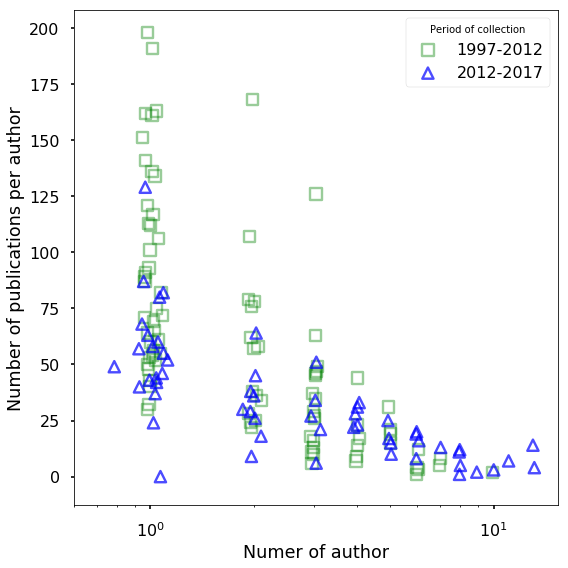

In [13]:
from artist import inst_by_color
from collections import Counter
### plot distribution of nb_pub:
f = plt.figure(figsize=(8, 8))
ax = f.add_subplot(111)
markers = ['o', 's', '*', 'X', 'D', '^', '1']
i = 0
# for k, gb in lookup_poinf.groupby('institute'):
#     if k in INST:
#         c = Counter(gb.total_pub_1997.values)
#         ax.plot(
#             list(c.values()),
#             list(c.keys()),
#             alpha=.3,
#             s=60,
#             edgecolors=inst_by_color[institute[k]],
#             marker=markers[i])
#         i+=1
c = Counter(lookup_poinf_concise.total_pub_1997.values)
ax.scatter(
    rand_jitter(list(c.values())),
    list(c.keys()),
#     s=70,
    alpha=.4,
    label='1997-2012',
    marker=markers[1],
    facecolor='',
    edgecolors='g',
    linewidths=2.4)
c = Counter(lookup_poinf_concise.total_pub_2012.values)
ax.scatter(
    rand_jitter(list(c.values())),
    list(c.keys()),
#     s=70,
    alpha=.7,
    label='2012-2017',
    marker=markers[-2],
    facecolor='',
    edgecolors='b',
    linewidths=2.4)

# sns.distplot(lookup_poinf.total_pub_2012.tolist()label='2012-2017', ax=ax, hist=False)
ax.set_ylabel('Number of publications per author')
ax.set_xlabel('Numer of author')
# ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(left=0.6)

ax.legend(loc=0, title='Period of collection')
f.tight_layout()

In [172]:
# Number of publications per author within each collection period against the number of authors 
# - power law more prominent in the concise publication
f.savefig('img/pub_per_author.png', format='png', bbox_inches='tight')

## Distribution of institutes

(1998.0, 2017.0)


/home/goweiting/.local/lib/python3.6/site-packages/ipykernel/__main__.py:11: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


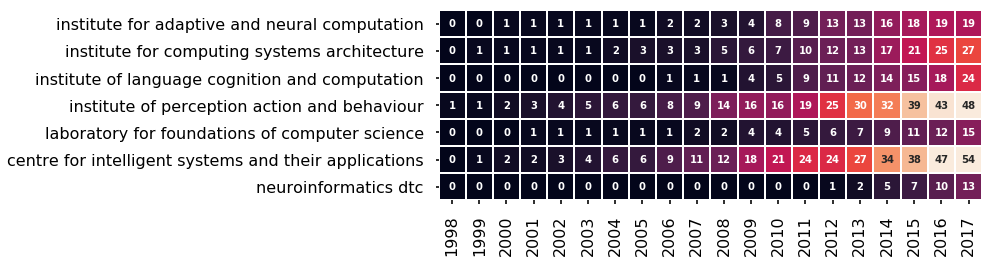

In [26]:
import operator
# Across time : x-axis = year; y-axis : eaech institute scatter with an individual when they exist
f = plt.figure(figsize=(10, 3.5))
# sns.set(font_scale=3)
i = 1
_xs = pd.unique(lookup_poinf_concise.first_pub_year)
_min = np.min(_xs)
_max = np.max(_xs)
print((_min, _max))

xs = np.linspace(_min, _max, _max - _min + 1, dtype=int)

mat = np.zeros([len(INST), len(xs)])
# print(mat.shape)
i = 0
for k, gb in lookup_poinf_concise.groupby('institute'):
    if k in INST:
        years = np.array(gb.first_pub_year.tolist())
        c = Counter(years)
        yrs = np.zeros_like(xs)
        for yr, v in sorted(list(c.items()), key=operator.itemgetter(0)):
            yrs[int(yr - _min)] = v
        vals = np.cumsum(yrs)
        mat[i] = vals
        #             print(yr)
        #             y=int(yr-_min)
        #             if y==0:
        #                 mat[i][y] = v
        #             else:
        #                 mat[i][y] = v + mat[i][y-1]
        #         mat[i][-1] = np.sum(mat[i])
        i += 1
total = np.sum(mat, axis=1)
# print(total)
xlabels = list(map(int, sorted(_xs)))
# mask = np.zeros_like(mat)
# mask[:,-1] = True
ax = sns.heatmap(
    mat,
    xticklabels=xlabels,
    yticklabels=INST,
    square=True,
    annot=True,
    robust=True,
    cbar=False,
    annot_kws={'fontweight': 'bold'},
    linewidths=1)
# ax2 = ax.twinx()
# ax2.set_yticklabels(total)
# ax2.set_yticks([0.05, 0.2, 0.35, 0.5, .63, 0.8, .95])
# print(locs)
# f.tight_layout()

In [27]:
f.savefig('img/growth_inst.png', format='png', bbox_inches='tight')

In [33]:
t= 0
t_in = 0
for k,v in lookup_poinf_concise.groupby('institute'):
    print(k,len(v))
    t+=len(v)
    if k in INST:
        t_in += len(v)
print(t, t_in)    

UNKNOWN 10
centre for intelligent systems and their applications 19
deanery of clinical sciences 1
institute for adaptive and neural computation 27
institute for computing systems architecture 24
institute of language cognition and computation 48
institute of perception action and behaviour 15
laboratory for foundations of computer science 54
neuroinformatics dtc 13
school of philosophy psychology and language sciences 1
212 200


```
class 0-UNKNOWN: 46
class 1-centre for intelligent systems and their applications: 24
class 2-institute of language cognition and computation: 59
class 3-laboratory for foundations of computer science: 64
class 4-institute for adaptive and neural computation: 29
class 5-institute for computing systems architecture: 28
class 6-neuroinformatics dtc: 17
class 7-institute of perception action and behaviour: 19
class 8-deanery of clinical sciences: 1
class 9-school of philosophy psychology and language sciences: 1
```

## Distribution of publications (by year)

In [ ]:
years = set()
data = {}
num_authors = {}

gb = lookup_pub.groupby('year')
for k, group in gb:
    if len(k) > 4:
        year = k[-2:]
        if int(year) > 17:  # 2017
            year = 1900 + int(year)
        else:
            year = 2000 + int(year)
    else:
        year = int(k)
    years.add(k)

    if year in data.keys():
        data[year] += len(group)
    else:
        data[year] = len(group)

    for pub in group.authors:
        num = len(pub.split("|"))
        if num in num_authors.keys():
            num_authors[num] += 1
        else:
            num_authors[num] = 1

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.barplot(data.keys(), data.values(), ax=ax, palette="Set3")
ax.set_xticklabels(data.keys(), rotation=60)
ax.set_xlabel('Year')
ax.set_ylabel('Number of publications')
fig.savefig('./img/distr_pub_year.pdf', format='pdf', bbox_inches='tight')

## Distribution of publications (number of coauthors)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.barplot(num_authors.keys(), num_authors.values(), ax=ax, palette="Set3")
ax.set_xlabel('Number of (co)authors')
ax.set_ylabel('Number of publications')
fig.savefig('./img/distr_pub_num_cauthors.pdf', format='pdf', bbox_inches='tight')